fatal: destination path 'TestPAML' already exists and is not an empty directory.
Epoch 1/5
8/8 - 1s - loss: 213.3805 - private_y_to_dy_6_loss: 213.3805 - private_y_to_dy_6_1_loss: 17.2307 - 1s/epoch - 140ms/step
Epoch 2/5
8/8 - 0s - loss: 186.7089 - private_y_to_dy_6_loss: 186.7089 - private_y_to_dy_6_1_loss: 16.6982 - 25ms/epoch - 3ms/step
Epoch 3/5
8/8 - 0s - loss: 166.6078 - private_y_to_dy_6_loss: 166.6078 - private_y_to_dy_6_1_loss: 16.1543 - 21ms/epoch - 3ms/step
Epoch 4/5
8/8 - 0s - loss: 143.3572 - private_y_to_dy_6_loss: 143.3572 - private_y_to_dy_6_1_loss: 15.4419 - 21ms/epoch - 3ms/step
Epoch 5/5
8/8 - 0s - loss: 117.0220 - private_y_to_dy_6_loss: 117.0220 - private_y_to_dy_6_1_loss: 14.6020 - 23ms/epoch - 3ms/step
It took 0:00:01.317949 sec to calibrate the model.


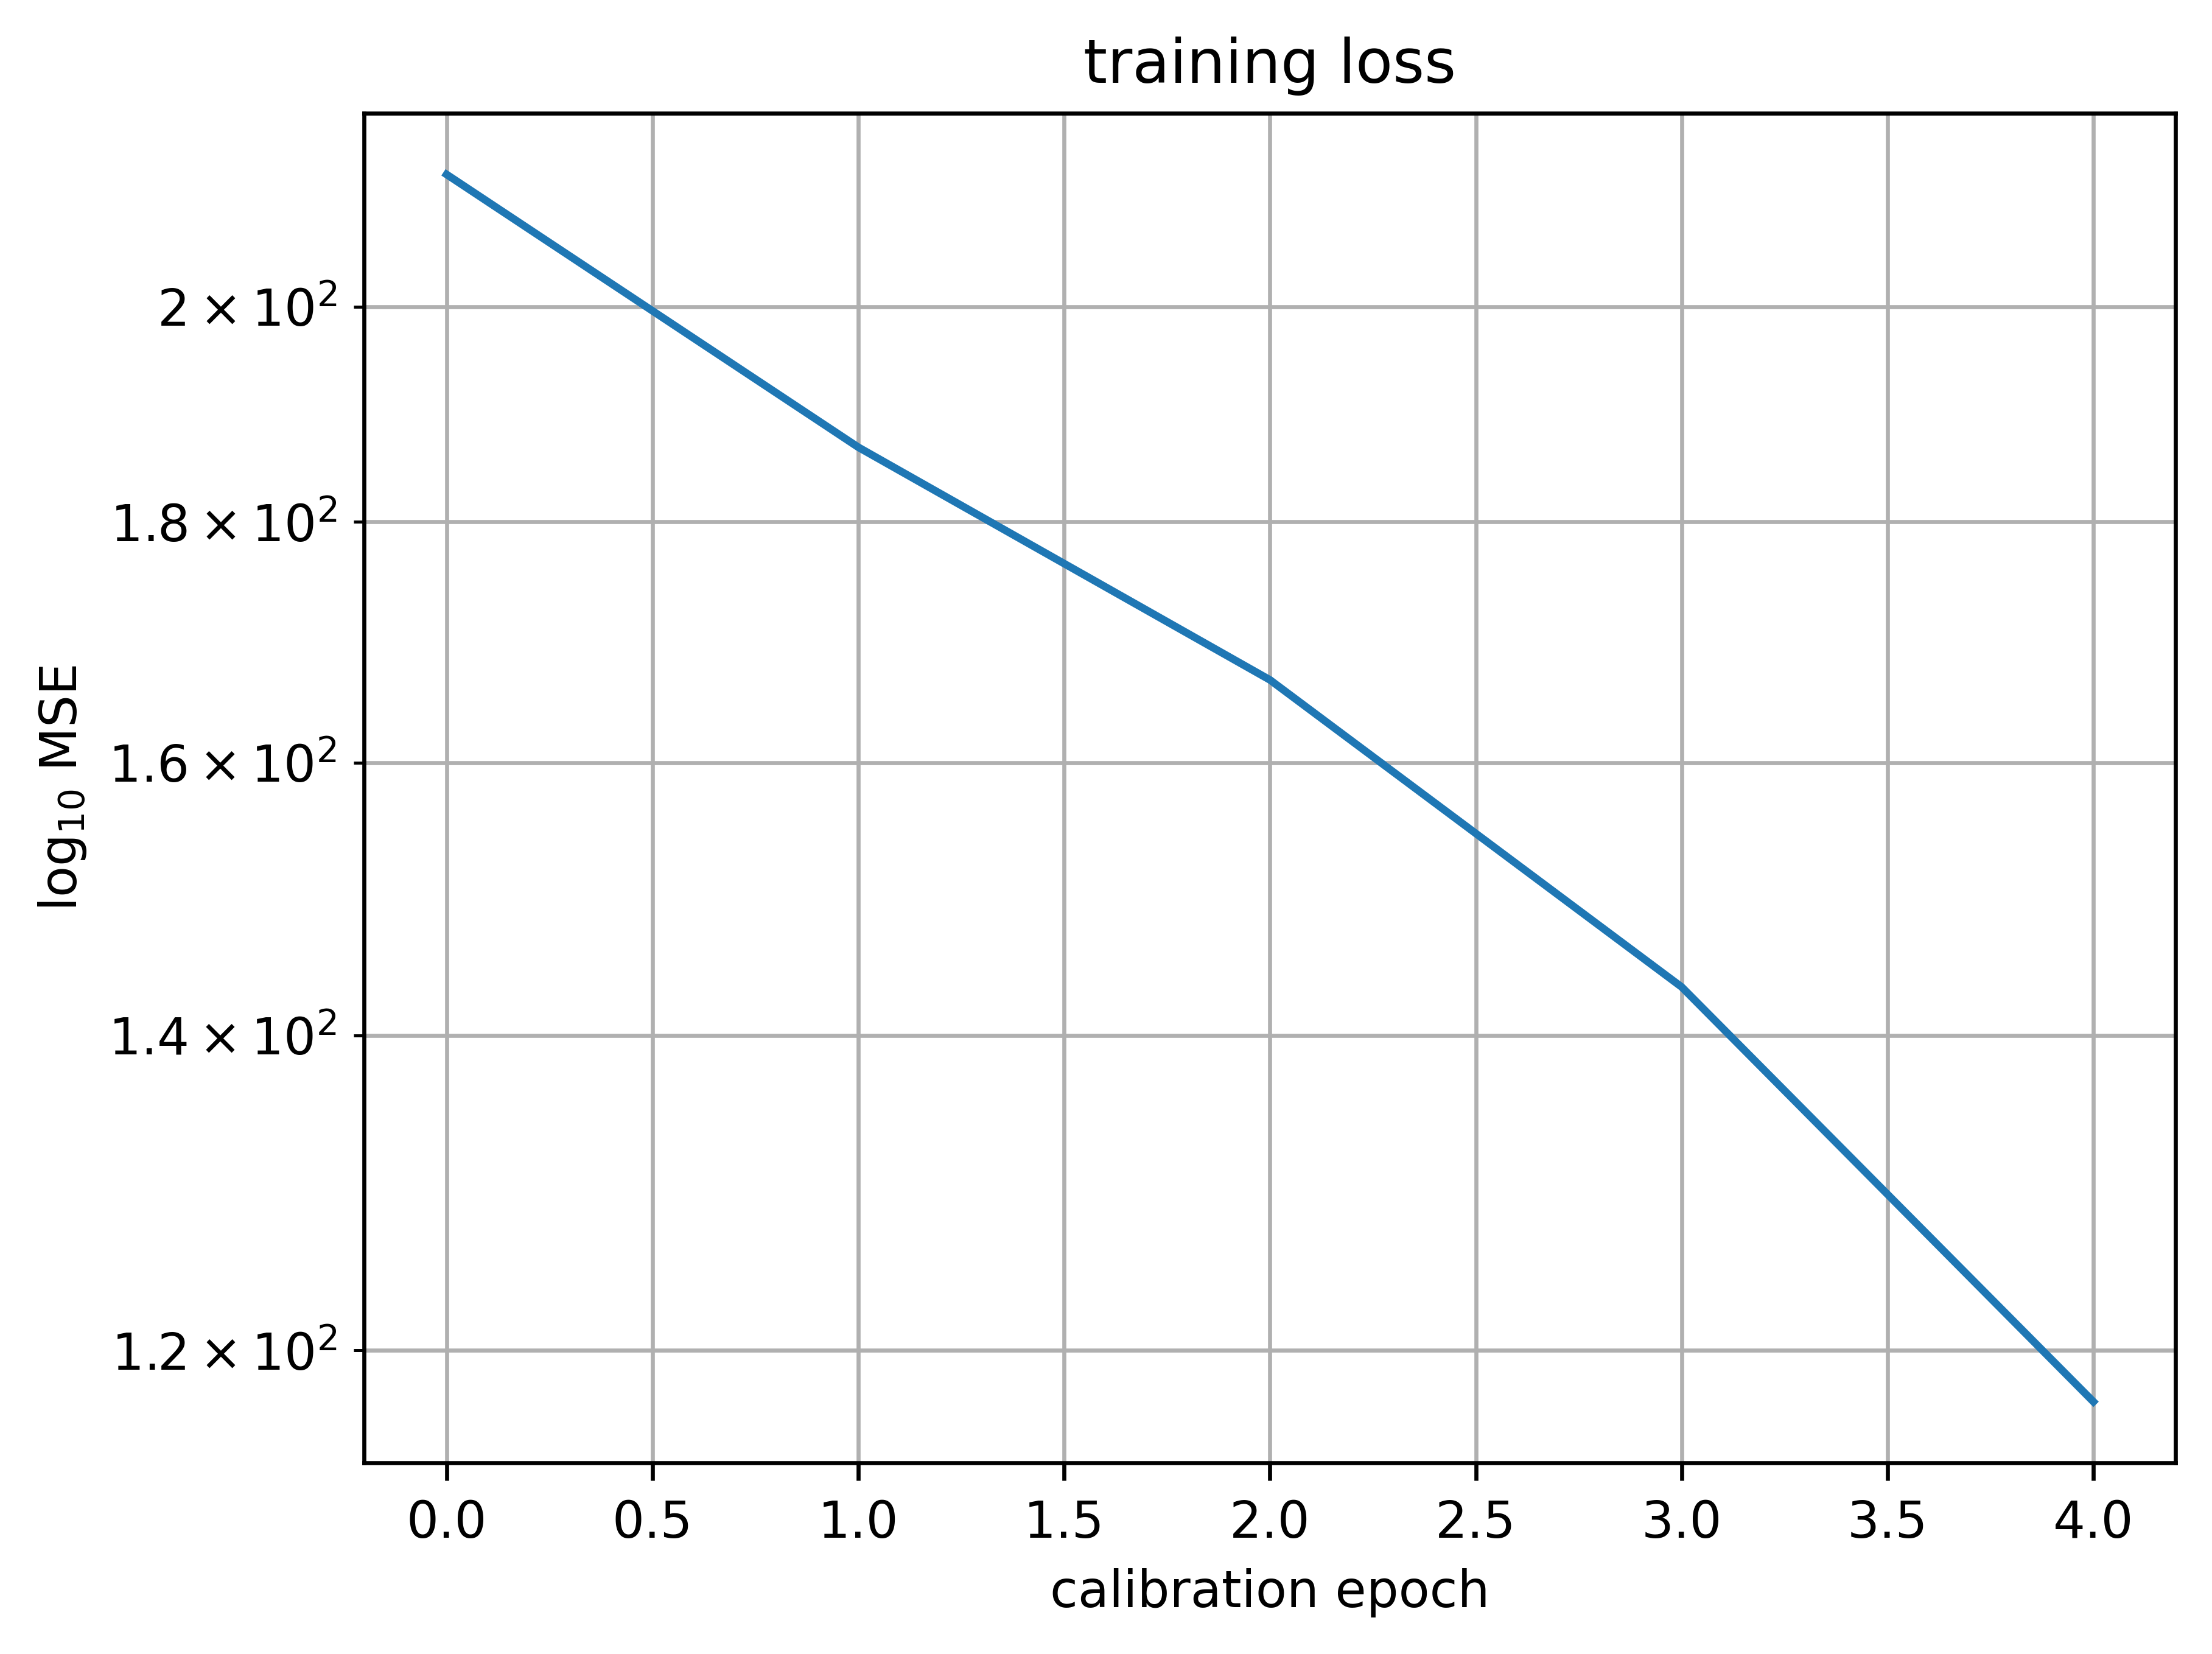

13/13 [==============================] - 0s 2ms/step


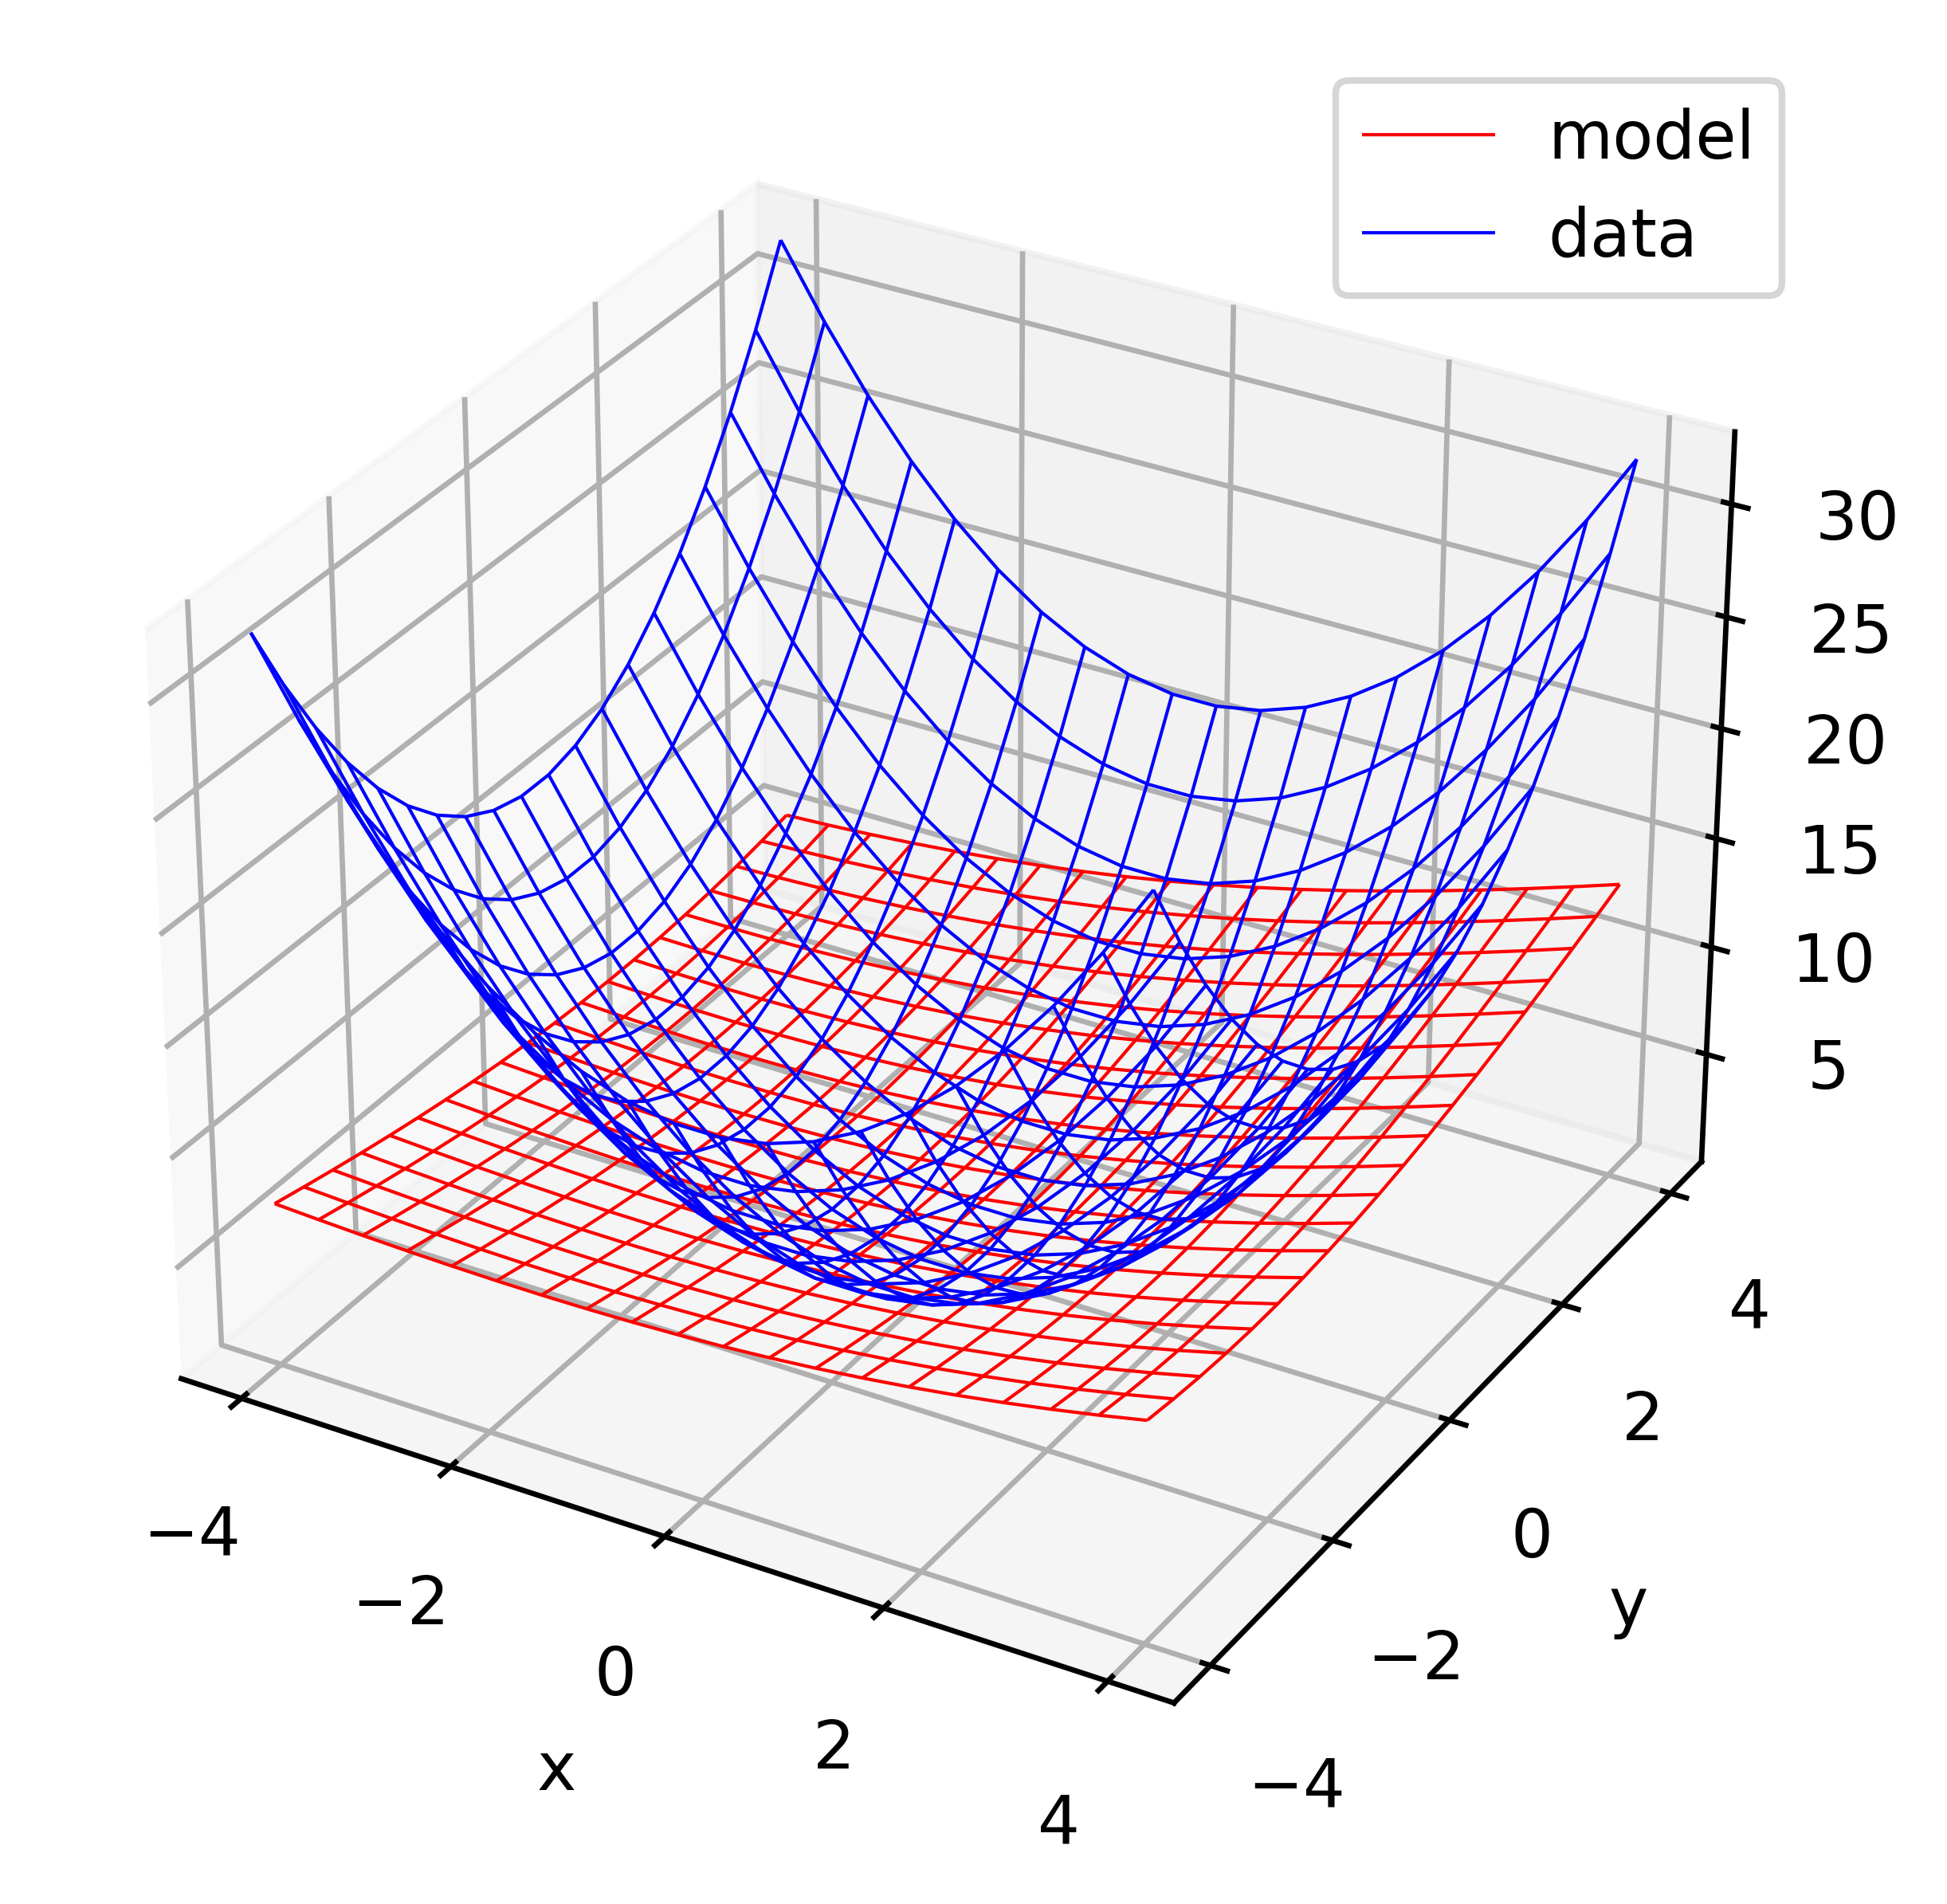

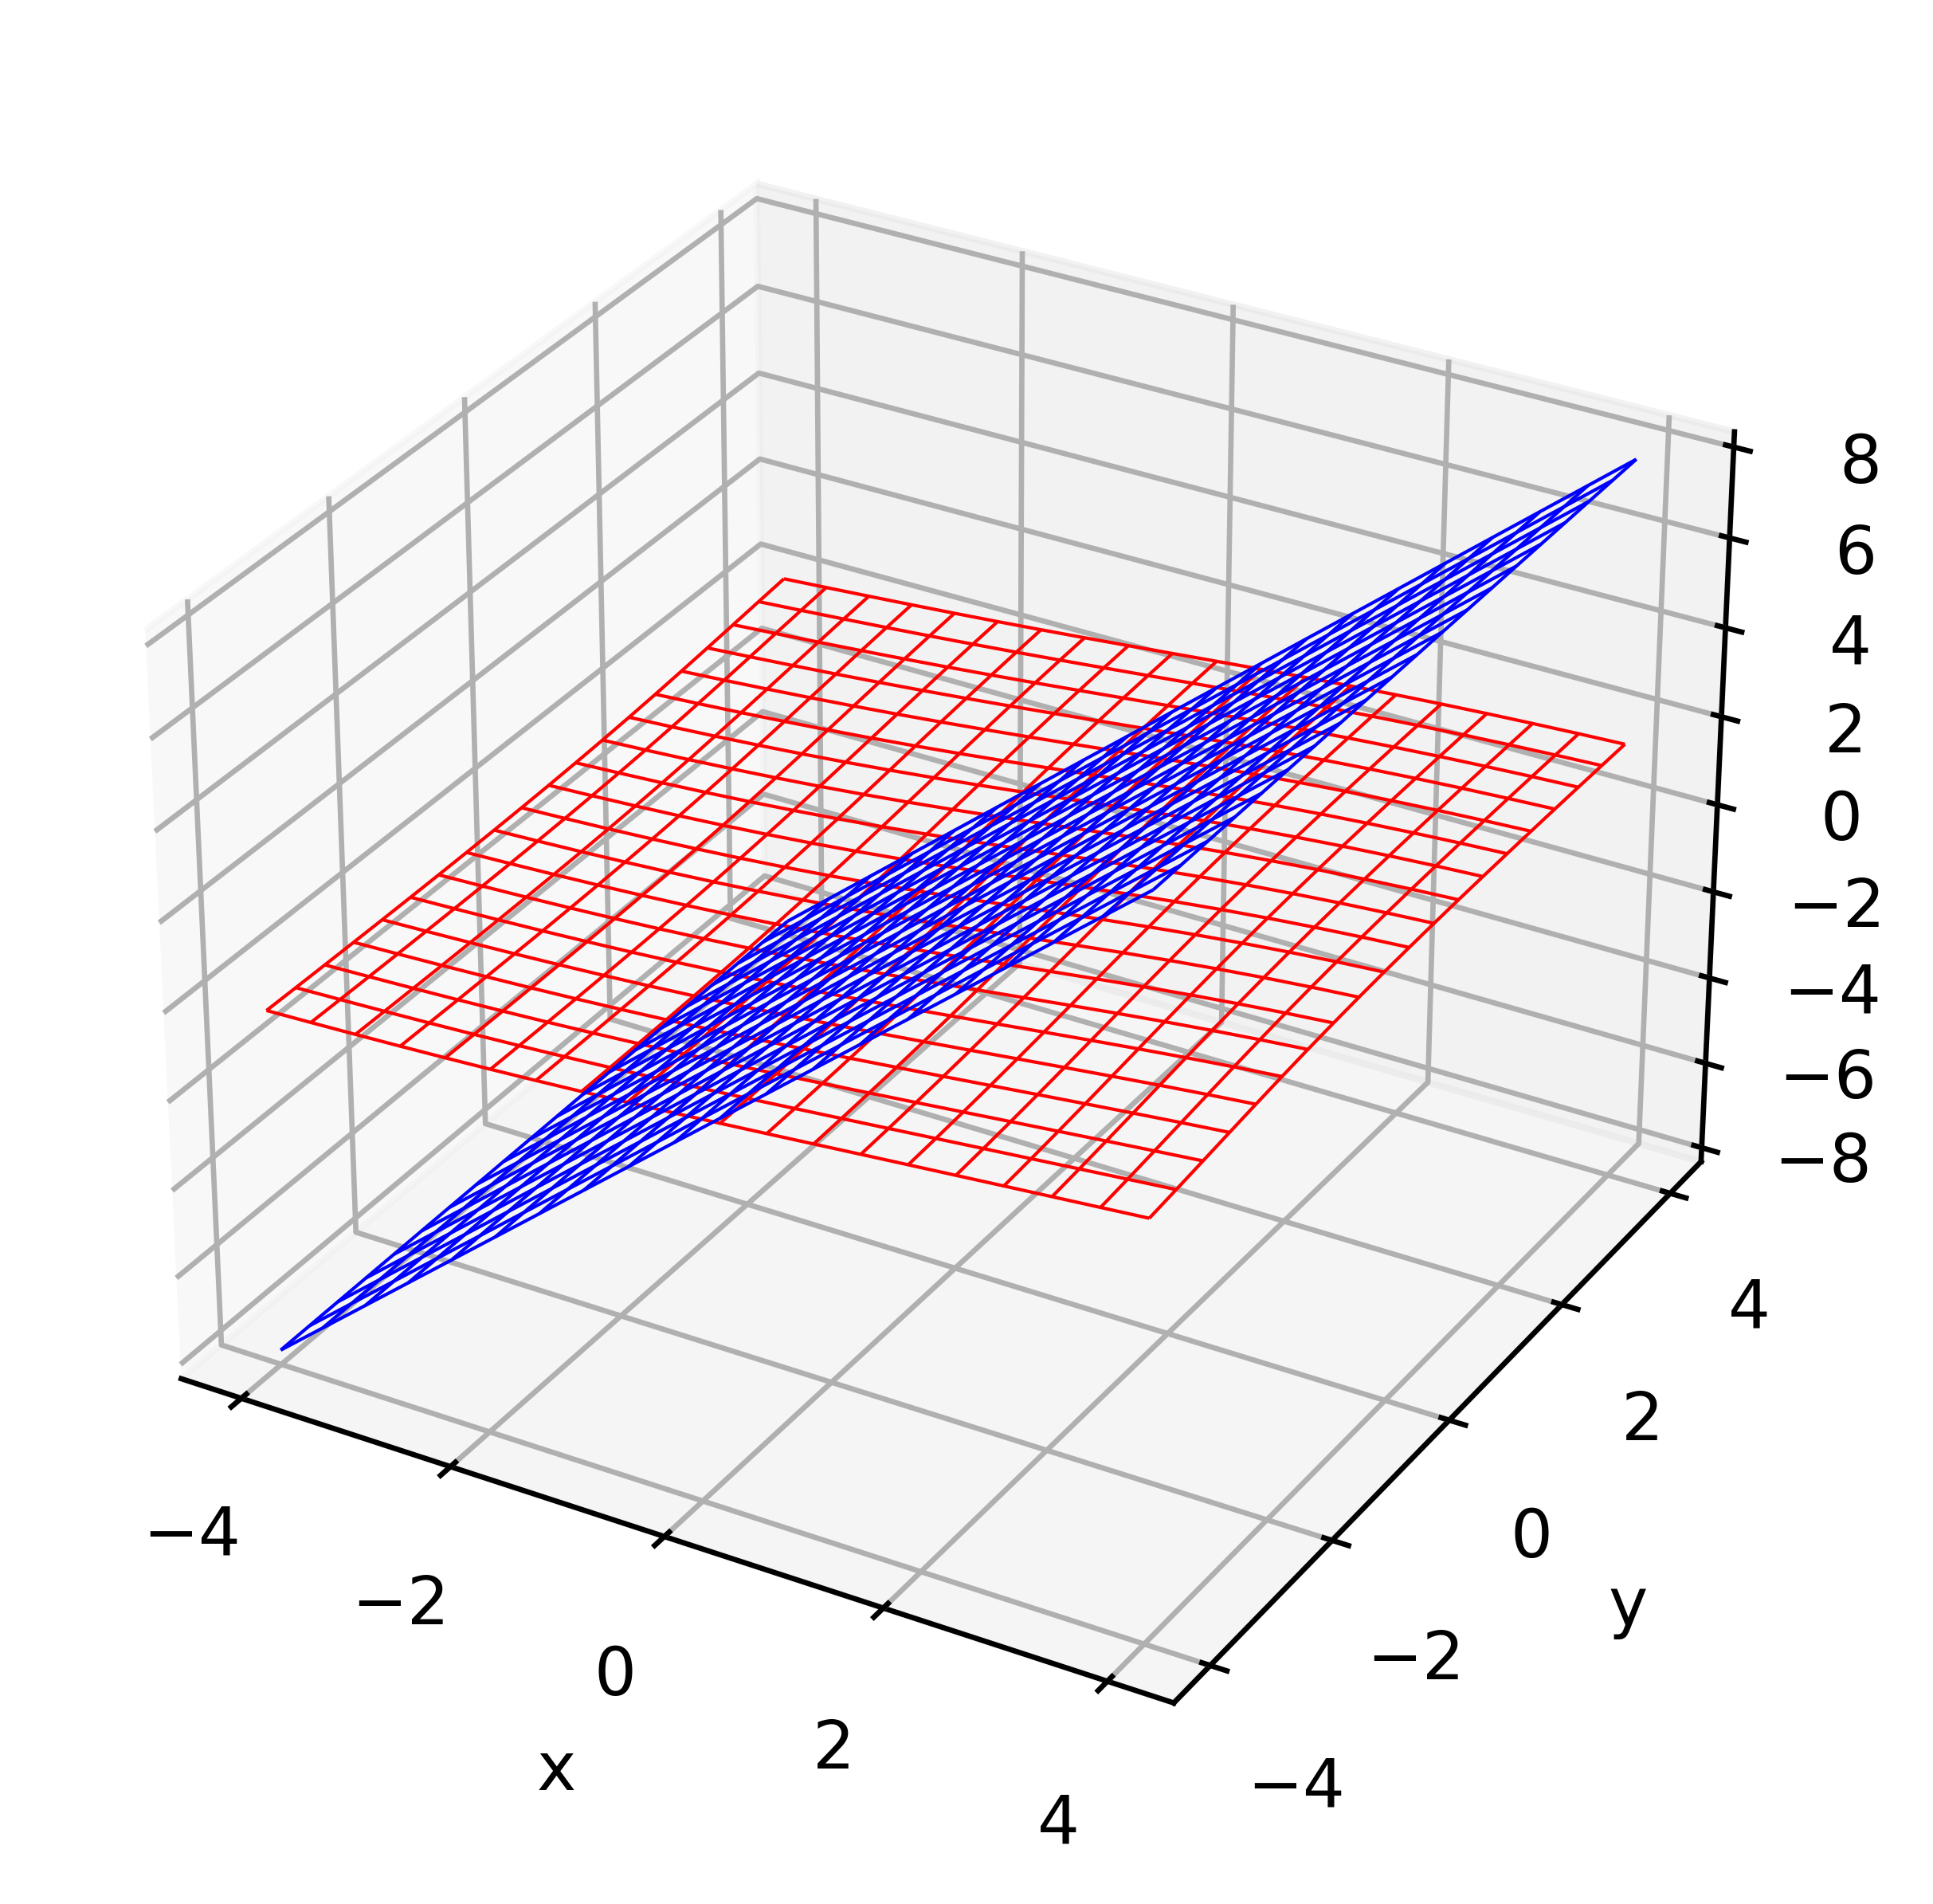

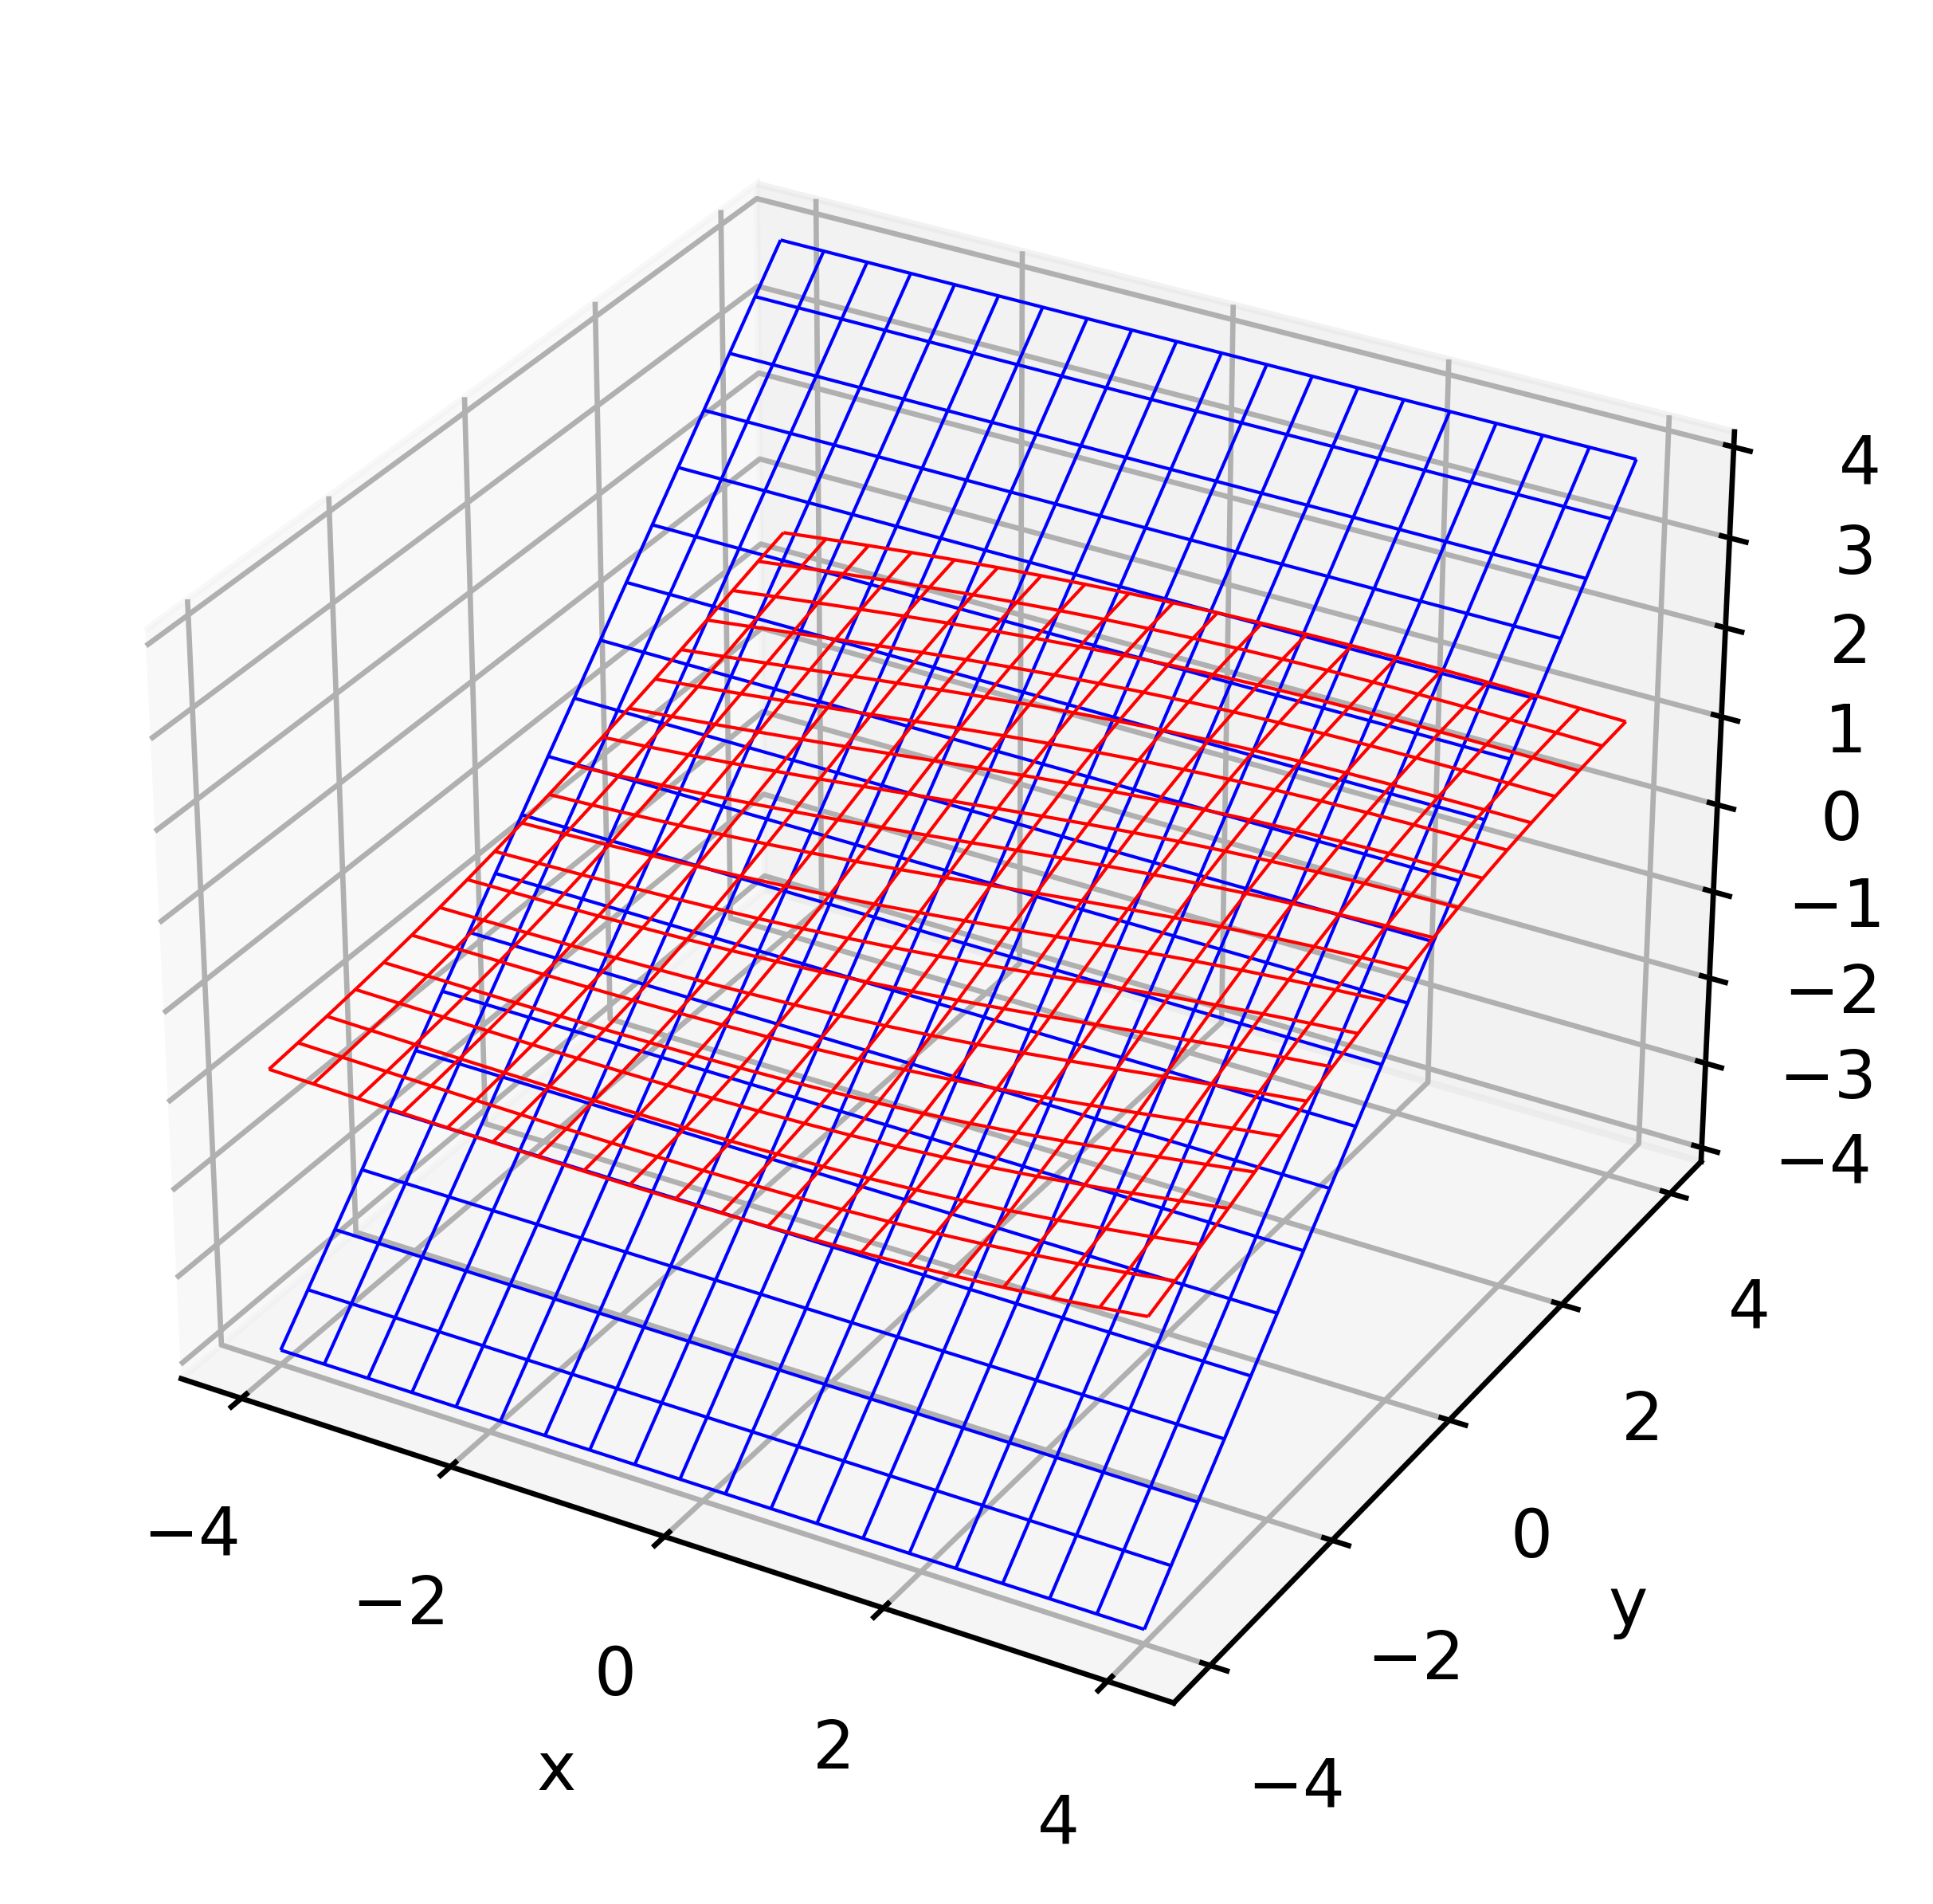

In [9]:
#!git clone https://github.com/klein-tu-da/PANN_invertible.git
!git clone https://github.com/MarkTUGithub/TestPAML.git
import os
import numpy as np
import tensorflow as tf
import datetime
import TestPAML.models as lm
from TestPAML.data import f2_data
from TestPAML.Task1plots import plot_f2

now = datetime.datetime.now

# set this to avoid conflicts with matplotlib

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

#%% load data

xs, ys, zs, grad, xs_c, ys_c, zs_c, grad_c = f2_data()
training_input = np.hstack((xs_c, ys_c))
training_output = [zs_c, grad_c]


#%% load model

model = lm.main()


#%% model calibration

t1 = now()
tf.keras.backend.set_value(model.optimizer.learning_rate, 0.002)
h = model.fit(training_input, training_output, epochs=500, verbose=2)
print(f"It took {now() - t1} sec to calibrate the model.")


#%% result plots

plot_f2(model, h)

